## 편향 보정 X
## 

In [ ]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
import random #데이터 전처리
from pandas import DataFrame #데이터 전처리
from collections import Counter #데이터 전처리

from tqdm import tqdm #시간 측정용

from sklearn.feature_extraction.text import CountVectorizer # model setting
from sklearn.model_selection import train_test_split  # model setting

from sklearn.naive_bayes import MultinomialNB  # model 관련
from sklearn.metrics import roc_auc_score  # model 성능 확인

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Face_News/news_train.csv")

train.head(2)

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Face_News/news_test.csv")

test.head(2)

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2


In [ ]:
submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Face_News/sample_submission.csv")

submission.head(2)

,id,info
0,NEWS00237_1,0
1,NEWS00237_2,0


In [ ]:
Counter(train['info'])

Counter({0: 71813, 1: 46932})

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 15.4MB/s 
     |████████████████████████████████| 890kB 59.5MB/s 
     |████████████████████████████████| 1.1MB 56.8MB/s 
     |████████████████████████████████| 2.9MB 58.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c0ae1532261922860b20417bcf8dbb0a583469d129d4722d13e65cb4fb93ebd8
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import ElectraTokenizer

In [ ]:
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
train['text'] = train['title'] + " " + train['content']
test['text'] = test['title'] + " " + test['content']

In [ ]:
import re

train_clear_text = list(train['text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  train_clear_text2.append(temp)
train['clear_text'] = train_clear_text2
train.head()

,n_id,date,title,content,ord,info,text,clear_text
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,[마감]코스닥 기관 678억 순매도 [이데일리 MARKETPOINT]15:32 현재...,마감코스닥 기관 678억 순매도 이데일리 MARKETPOINT1532 현재 코스닥 ...
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"[마감]코스닥 기관 678억 순매도 ""실적기반"" 저가에 매집해야 할 8월 급등유망주...",마감코스닥 기관 678억 순매도 실적기반 저가에 매집해야 할 8월 급등유망주 TOP...
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"[마감]코스닥 기관 678억 순매도 하이스탁론, 선취수수료 없는 월 0.4% 최저금...",마감코스닥 기관 678억 순매도 하이스탁론 선취수수료 없는 월 04 최저금리 상품 출시
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,[마감]코스닥 기관 678억 순매도 종합 경제정보 미디어 이데일리 - 무단전재 & ...,마감코스닥 기관 678억 순매도 종합 경제정보 미디어 이데일리 무단전재 재배포 금지
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참 전국적인 소비 붐 조성에 기여할 예정",롯데·공영 등 7개 TV 홈쇼핑들 동행세일 동참 전국적인 소비 붐 조성에 기여할 예정


In [ ]:
import re

train_clear_text = list(test['text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  train_clear_text2.append(temp)
test['clear_text'] = train_clear_text2
test.head()

,n_id,date,title,content,ord,id,text,clear_text
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 마이크로 LED T...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 마이크로 LED TV 장비...
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 [이데일리 김대웅 ...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 이데일리 김대웅 기자 반도...
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 최근 대형 업체들과...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 최근 대형 업체들과 거래를...
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 TV를 필두로 올해...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 TV를 필두로 올해부터 마...
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 코세스는 반도체 장...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 코세스는 반도체 장비를 제...


In [ ]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

X_train = []

text = list(train['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = tokenizer.tokenize(text[i])
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 118745/118745 [00:35<00:00, 3391.91it/s]


In [ ]:
# from keras.preprocessing.text import Tokenizer
# max_words = 10000
# tokenizer = Tokenizer(num_words = max_words)
# tokenizer.fit_on_texts(X_token)
# X_train = tokenizer.texts_to_sequences(X_token)
# X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_test = []

text = list(test['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = tokenizer.tokenize(text[i])
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 142565/142565 [00:41<00:00, 3432.01it/s]


In [ ]:
print(X_train[:5])

[['마감', '##코스', '##닥', '기관', '67', '##8', '##억', '순매도', '이데', '##일리', 'MA', '##R', '##K', '##ET', '##P', '##O', '##IN', '##T', '##15', '##32', '현재', '코스닥', '기관', '67', '##8', '##억', '순매도'], ['마감', '##코스', '##닥', '기관', '67', '##8', '##억', '순매도', '실적', '##기', '##반', '##가', '##에', '##집', '##해야', '##월', '급등', '##유', '##망', '##주', 'TOP', '전격', '##공', '##개'], ['마감', '##코스', '##닥', '기관', '67', '##8', '##억', '순매도', '하이', '##스', '##탁', '##론', '선취', '##수수', '##료', '##는', '04', '최저', '##금리', '상품', '출시'], ['마감', '##코스', '##닥', '기관', '67', '##8', '##억', '순매도', '종합', '경제', '##정보', '미디어', '이데', '##일리', '무단', '##전', '##재', '재배', '##포', '금지'], ['롯데', '공영', '##개', 'TV', '##쇼', '##핑', '##들', '동행', '##세', '##일', '동참', '전국', '##적', '##인', '소비', '조성', '##에', '기여', '##할', '예정']]


In [ ]:
X_temp = []

text = X_train

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = tokenizer.convert_tokens_to_ids(text[i])
  X_temp.append(temp_X)
X_train = X_temp

100%|██████████| 118745/118745 [00:03<00:00, 31114.08it/s]


In [ ]:
X_temp = []

text = X_test

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = tokenizer.convert_tokens_to_ids(text[i])
  X_temp.append(temp_X)
X_test = X_temp

100%|██████████| 142565/142565 [00:04<00:00, 31947.82it/s]


In [ ]:
print(X_train[:5])

[[9011, 19334, 4619, 6468, 9328, 4193, 4639, 18260, 13014, 8854, 17627, 4111, 4170, 29624, 4105, 4014, 17471, 4169, 21974, 26397, 6339, 11942, 6468, 9328, 4193, 4639, 18260], [9011, 19334, 4619, 6468, 9328, 4193, 4639, 18260, 7521, 4031, 4131, 4070, 4073, 4557, 18991, 4501, 11916, 4074, 4227, 4076, 27215, 12552, 4333, 4217], [9011, 19334, 4619, 6468, 9328, 4193, 4639, 18260, 7527, 4063, 4734, 4300, 31127, 9990, 4701, 4034, 10965, 7979, 17165, 6697, 6980], [9011, 19334, 4619, 6468, 9328, 4193, 4639, 18260, 7028, 6277, 21590, 7978, 13014, 8854, 14100, 4068, 4171, 10572, 4190, 7399], [6988, 13667, 4217, 6943, 4766, 5095, 4006, 12269, 4246, 4366, 10654, 6635, 4199, 4139, 6562, 6994, 4073, 7991, 4519, 6446]]


문자의 최대 길이 : 1706
문자의 평균 길이 :  34.955812876331635


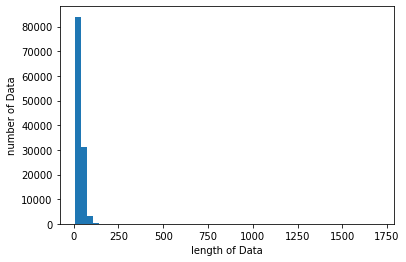

In [ ]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 : 1107
문자의 평균 길이 :  35.033247992143934


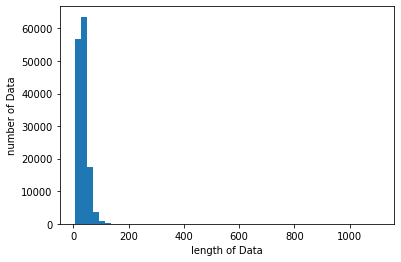

In [ ]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [ ]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train['info'])):
  if train['info'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train['info'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [ ]:
test.head()

,n_id,date,title,content,ord,id,text,clear_text
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 마이크로 LED T...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 마이크로 LED TV 장비...
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 [이데일리 김대웅 ...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 이데일리 김대웅 기자 반도...
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 최근 대형 업체들과...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 최근 대형 업체들과 거래를...
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 TV를 필두로 올해...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 TV를 필두로 올해부터 마...
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대 코세스는 반도체 장...",주목e스몰캡코세스 마이크로LED 시장 개화 최대수혜 기대 코세스는 반도체 장비를 제...


In [ ]:
import keras
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [ ]:
glove = dict()
f = open('/content/drive/MyDrive/Colab Notebooks/word-embeddings/glove/glove.txt')
for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    glove[word] = vector
f.close()

In [ ]:
max_len = 1706 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
embedding_matrix = np.zeros((1706 , 300)) #300차원의 임베딩 매트릭스 생성

for index, word in enumerate(tokenizer): #vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
    if word in glove: #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
        embedding_vector = glove[word] #해당 토큰에 해당하는 vector를 불러오고
        embedding_mxtrix[i] = embedding_vector #해당 위치의 embedding_mxtrix에 저장합니다.
    else:
        print("glove 없는 단어입니다.")
        break

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
max_words = 35000
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         3500000   
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 128)         117248    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 3,668,802
Trainable params: 3,668,802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 256
epochs = 2
embed_size = 100
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.python.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Face_News/News_4Layer.h5')

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_split=0.1 , epochs = 4, callbacks = [learning_rate_reduction])

Epoch 1/4
418/418 [==============================] - 5340s 13s/step - loss: 0.1294 - accuracy: 0.9471 - val_loss: 0.0778 - val_accuracy: 0.9636
Epoch 2/4
418/418 [==============================] - 5350s 13s/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0505 - val_accuracy: 0.9805
Epoch 3/4
418/418 [==============================] - 5343s 13s/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0730 - val_accuracy: 0.9791
Epoch 4/4
418/418 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9972 
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
418/418 [==============================] - 5447s 13s/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.1078 - val_accuracy: 0.9734


In [ ]:
from keras.models import load_model
model.save('./drive/MyDrive/News_4Layer2.h5')

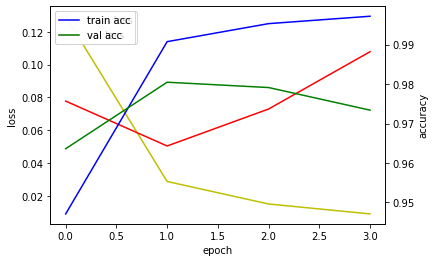

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
ls

drive/  sample_data/


In [ ]:
mypredict = model.predict(X_test)

In [ ]:
submission_ids = test['id']
my_result = []

for i in range(len(mypredict)):
  my_result.append(int(mypredict[i][1]>=mypredict[i][0]))

sub_dict = {"id":submission_ids, "info":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("./drive/MyDrive/news3.csv", index=False, encoding='utf-8')
pd.read_csv("./drive/MyDrive/news3.csv")

,id,info
0,NEWS00237_1,1
1,NEWS00237_2,0
2,NEWS00237_3,0
3,NEWS00237_4,0
4,NEWS00237_5,0
...,...,...
142560,NEWS09482_72,1
142561,NEWS09482_73,1
142562,NEWS09482_74,1
142563,NEWS09482_75,1


In [ ]:
from keras.models import load_model
model.save('News_4Layer.h5')